In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.feature_selection import RFE
warnings.filterwarnings('ignore')

In [100]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
df=pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## first check the data

In [8]:
df.shape

(14999, 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### there is no missing values in our data

In [14]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [9]:
num_data=['satisfaction_level','last_evalution','number_project','avarage_monthly_hours','time_spend_company','Work_accident'
         ,'promotion_last_5years']
cat_data=['Department','salary']

In [11]:
df['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [12]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

### sales department has the highest employees and most of the employess are having tha low salary

In [15]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [66]:
df.groupby('Department')['salary'].describe()

,count,unique,top,freq
Department,,,,
IT,1227,3,low,609
RandD,787,3,medium,372
accounting,767,3,low,358
hr,739,3,medium,359
management,630,3,high,225
marketing,858,3,low,402
product_mng,902,3,low,451
sales,4140,3,low,2099
support,2229,3,low,1146


In [59]:
df.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


### let's check how many employees left from the perticular Departmment

In [43]:
df.pivot_table(index='left',columns='Department',aggfunc='count')

Work_accident                                             \
Department            IT RandD accounting   hr management marketing   
left                                                                  
0                    954   666        563  524        539       655   
1                    273   121        204  215         91       203   

                                               average_montly_hours        \
Department product_mng sales support technical                   IT RandD   
left                                                                        
0                  704  3126    1674      2023                  954   666   
1                  198  1014     555       697                  273   121   

                                                                           \
Department accounting   hr management marketing product_mng sales support   
left                                                                        
0                 563  524        539       655         704  3126    1674   
1                 204  215         91       203         198  1014     555   

                     last_evaluation                                   \
Department technical              IT RandD accounting   hr management   
left                                                                    
0               2023             954   666        563  524        539   
1                697             273   121        204  215         91   

                                                         number_project        \
Department marketing product_mng sales support technical             IT RandD   
left                                                                            
0                655         704  3126    1674      2023            954   666   
1                203         198  1014     555       697            273   121   

                                                                           \
Department accounting   hr management marketing product_mng sales support   
left                                                                        
0                 563  524        539       655         704  3126    1674   
1                 204  215         91       203         198  1014     555   

                     promotion_last_5years                                   \
Department technical                    IT RandD accounting   hr management   
left                                                                          
0               2023                   954   666        563  524        539   
1                697                   273   121        204  215         91   

                                                         salary        \
Department marketing product_mng sales support technical     IT RandD   
left                                                                    
0                655         704  3126    1674      2023    954   666   
1                203         198  1014     555       697    273   121   

                                                                           \
Department accounting   hr management marketing product_mng sales support   
left                                                                        
0                 563  524        539       655         704  3126    1674   
1                 204  215         91       203         198  1014     555   

                     satisfaction_level                                   \
Department technical                 IT RandD accounting   hr management   
left                                                                       
0               2023                954   666        563  524        539   
1                697                273   121        204  215         91   

                                                         time_spend_company  \
Department marketing product_mng sales support technical                 IT   
left                                  

#### Highest number of employee left from the sales dept and lowest from the management dept.

## Let's check how many employees from the perticular department got the promotion

In [46]:
df.pivot_table(index='promotion_last_5years',columns='Department',aggfunc='count')

Work_accident                                      \
Department                       IT  RandD accounting     hr management   
promotion_last_5years                                                     
0                            1224.0  760.0      753.0  724.0      561.0   
1                               3.0   27.0       14.0   15.0       69.0   

                                                                       \
Department            marketing product_mng   sales support technical   
promotion_last_5years                                                   
0                         815.0       902.0  4040.0  2209.0    2692.0   
1                          43.0         NaN   100.0    20.0      28.0   

                      average_montly_hours                           \
Department                              IT  RandD accounting     hr   
promotion_last_5years                                                 
0                                   1224.0  760.0      753.0  724.0   
1                                      3.0   27.0       14.0   15.0   

                                                                        \
Department            management marketing product_mng   sales support   
promotion_last_5years                                                    
0                          561.0     815.0       902.0  4040.0  2209.0   
1                           69.0      43.0         NaN   100.0    20.0   

                                last_evaluation                           \
Department            technical              IT  RandD accounting     hr   
promotion_last_5years                                                      
0                        2692.0          1224.0  760.0      753.0  724.0   
1                          28.0             3.0   27.0       14.0   15.0   

                                                                        \
Department            management marketing product_mng   sales support   
promotion_last_5years                                                    
0                          561.0     815.0       902.0  4040.0  2209.0   
1                           69.0      43.0         NaN   100.0    20.0   

                                   left                                      \
Department            technical      IT  RandD accounting     hr management   
promotion_last_5years                                                         
0                        2692.0  1224.0  760.0      753.0  724.0      561.0   
1                          28.0     3.0   27.0       14.0   15.0       69.0   

                                                                       \
Department            marketing product_mng   sales support technical   
promotion_last_5years                                                   
0                         815.0       902.0  4040.0  2209.0    2692.0   
1                          43.0         NaN   100.0    20.0      28.0   

                      number_project                                      \
Department                        IT  RandD accounting     hr management   
promotion_last_5years                                                      
0                             1224.0  760.0      753.0  724.0      561.0   
1                                3.0   27.0       14.0   15.0       69.0   

                                                                       salary  \
Department            marketing product_mng   sales support technical      IT   
promotion_last_5years                                                           
0                         815.0       902.0  4040.0  2209.0    2692.0  1224.0   
1                          43.0         NaN   100.0    20.0      28.0     3.0   

                                                                     \
Department             RandD accounting     hr management marketing   
promotion_last_5years                                                 
0                      760.0      753.0

### only dept. who has promoted all the employees is product_mng and sales has not promoted 100 employees since last 5 years

### Which dept gives the highest salary

In [67]:
df.pivot_table(index='salary',columns='Department',aggfunc='count')

Work_accident                                             \
Department            IT RandD accounting   hr management marketing   
salary                                                                
high                  83    51         74   45        225        80   
low                  609   364        358  335        180       402   
medium               535   372        335  359        225       376   

                                               average_montly_hours        \
Department product_mng sales support technical                   IT RandD   
salary                                                                      
high                68   269     141       201                   83    51   
low                451  2099    1146      1372                  609   364   
medium             383  1772     942      1147                  535   372   

                                                                           \
Department accounting   hr management marketing product_mng sales support   
salary                                                                      
high               74   45        225        80          68   269     141   
low               358  335        180       402         451  2099    1146   
medium            335  359        225       376         383  1772     942   

                     last_evaluation                                   \
Department technical              IT RandD accounting   hr management   
salary                                                                  
high             201              83    51         74   45        225   
low             1372             609   364        358  335        180   
medium          1147             535   372        335  359        225   

                                                         left        \
Department marketing product_mng sales support technical   IT RandD   
salary                                                                
high              80          68   269     141       201   83    51   
low              402         451  2099    1146      1372  609   364   
medium           376         383  1772     942      1147  535   372   

                                                                           \
Department accounting   hr management marketing product_mng sales support   
salary                                                                      
high               74   45        225        80          68   269     141   
low               358  335        180       402         451  2099    1146   
medium            335  359        225       376         383  1772     942   

                     number_project                                   \
Department technical             IT RandD accounting   hr management   
salary                                                                 
high             201             83    51         74   45        225   
low             1372            609   364        358  335        180   
medium          1147            535   372        335  359        225   

                                                          \
Department marketing product_mng sales support technical   
salary                                                     
high              80          68   269     141       201   
low              402         451  2099    1146      1372   
medium           376         383  1772     942      1147   

           promotion_last_5years                                             \
Department                    IT RandD accounting   hr management marketing   
salary                                                                        
high                          83    51         74   45        225        80   
low                          609   364        358  335        180       402   
medium                       535   372        335  359        225       376   

                                               satisfaction_

### No. of projects done

In [81]:
df.pivot_table(index='left',columns='number_project',aggfunc='count')

Department                                       Work_accident  \
number_project          2       3       4       5      6      7             2   
left                                                                            
0                   821.0  3983.0  3956.0  2149.0  519.0    NaN         821.0   
1                  1567.0    72.0   409.0   612.0  655.0  256.0        1567.0   

                                                     average_montly_hours  \
number_project       3       4       5      6      7                    2   
left                                                                        
0               3983.0  3956.0  2149.0  519.0    NaN                821.0   
1                 72.0   409.0   612.0  655.0  256.0               1567.0   

                                                     last_evaluation          \
number_project       3       4       5      6      7               2       3   
left                                                                           
0               3983.0  3956.0  2149.0  519.0    NaN           821.0  3983.0   
1                 72.0   409.0   612.0  655.0  256.0          1567.0    72.0   

                                             promotion_last_5years          \
number_project       4       5      6      7                     2       3   
left                                                                         
0               3956.0  2149.0  519.0    NaN                 821.0  3983.0   
1                409.0   612.0  655.0  256.0                1567.0    72.0   

                                              salary                          \
number_project       4       5      6      7       2       3       4       5   
left                                                                           
0               3956.0  2149.0  519.0    NaN   821.0  3983.0  3956.0  2149.0   
1                409.0   612.0  655.0  256.0  1567.0    72.0   409.0   612.0   

                             satisfaction_level                          \
number_project      6      7                  2       3       4       5   
left                                                                      
0               519.0    NaN              821.0  3983.0  3956.0  2149.0   
1               655.0  256.0             1567.0    72.0   409.0   612.0   

                             time_spend_company                          \
number_project      6      7                  2       3       4       5   
left                                                                      
0               519.0    NaN              821.0  3983.0  3956.0  2149.0   
1               655.0  256.0             1567.0    72.0   409.0   612.0   

                              
number_project      6      7  
left                          
0               519.0    NaN  
1               655.0  256.0

# Let's Visualize this information

In [28]:
sns.set_style('whitegrid')

Text(0.5, 0, 'satisfaction_level')

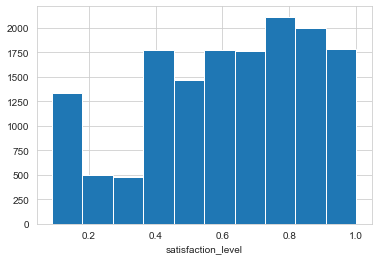

In [29]:
plt.figure()
plt.hist(df['satisfaction_level'],bins=10)
plt.xlabel('satisfaction_level')

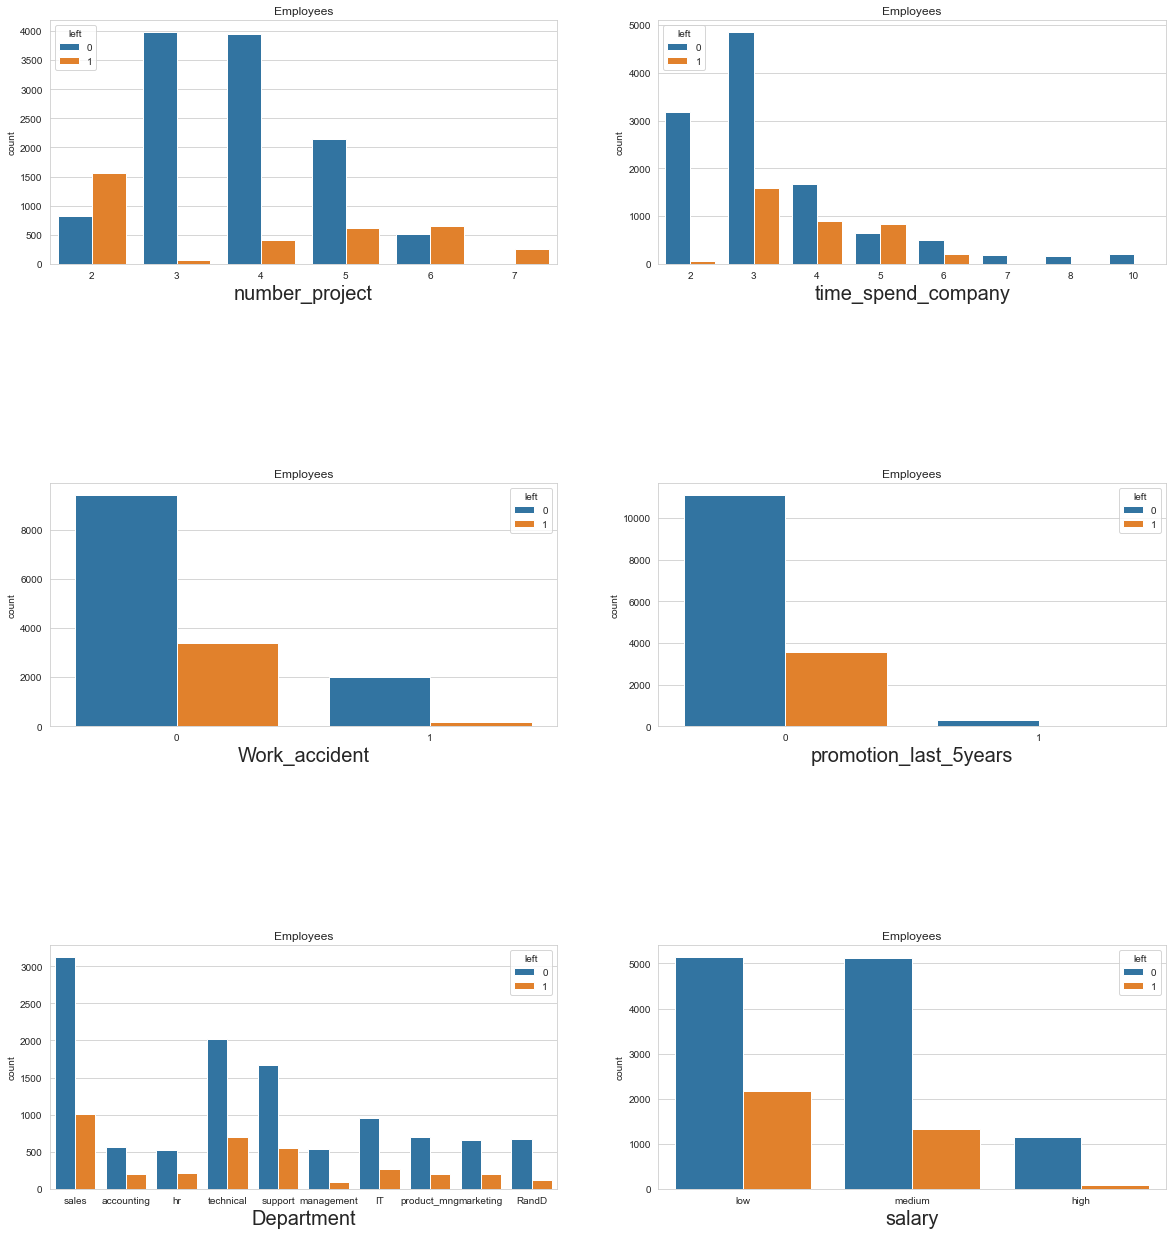

In [83]:
columns=['number_project','time_spend_company','Work_accident', 'promotion_last_5years','Department','salary']
fig=plt.subplots(figsize=(20,30))
for i,j in enumerate(columns):
    plt.subplot(4,2,i+1)
    plt.subplots_adjust(hspace=0.9)
    sns.countplot(x=j,data=df,hue=df['left'])
    plt.xlabel(j,fontsize=20)
    plt.title('Employees')

### Now we need to handle the categorical features so our model can easily process the numerical features
#### we'll use the LabelEncoder from the sklearn to handle  the categorical features

In [99]:
le=LabelEncoder()
df['Dept.encodded']=le.fit_transform(df['Department'].astype(str))
df['Slary encodded']=le.fit_transform(df['salary'].astype(str))
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,Dept.encodded,Slary encodded
0,0.38,0.53,2,157,3,0,1,0,sales,low,7,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,7,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,7,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,7,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,7,1


In [101]:
for feature in cat_data:
    le=LabelEncoder()
    df[feature]=le.fit_transform(df[feature].astype(str))
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


# Check the correlation with left 

In [102]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.003153,0.011754
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.007772,0.013965
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.009268,0.009672
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.003913,0.007082
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.018010,-0.003086
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.003425,-0.002506
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,0.032105,-0.001294
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.027336,-0.001318
Department,0.003153,0.007772,0.009268,0.003913,-0.018010,0.003425,0.032105,-0.027336,1.000000,0.000685
salary,0.011754,0.013965,0.009672,0.007082,-0.003086,-0.002506,-0.001294,-0.001318,0.000685,1.000000


### There are some columns where corr is not positive so we will drop those columns
#### but the salary and promotion columns do have much negative correlation so we wont drop them

In [249]:
data_cleaned=df.copy()

In [250]:
data_cleaned.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [251]:
corr_col=['Work_accident','promotion_last_5years','number_project']
data_cleaned.drop(corr_col,axis=1,inplace=True)

In [252]:
data_cleaned.head()

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,left,Department,salary
0,0.38,0.53,157,3,1,7,1
1,0.80,0.86,262,6,1,7,2
2,0.11,0.88,272,4,1,7,2
3,0.72,0.87,223,5,1,7,1
4,0.37,0.52,159,3,1,7,1


# Using Logistic Regression

In [253]:
features=data_cleaned.drop('left',axis=1)
labels=data_cleaned['left']

In [254]:
x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=0.20,random_state=43)

## Hyperparameter tunning of C Parameter

In [242]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [243]:
parameters = {
    'C': [0.001,0.01,1,10,100,1000]
}
cv=GridSearchCV(lg,parameters,cv=5)
cv.fit(features,labels.values.ravel())
print_results(cv)

BEST PARAMS: {'C': 0.01}

0.724 (+/-0.152) for {'C': 0.001}
0.754 (+/-0.165) for {'C': 0.01}
0.741 (+/-0.122) for {'C': 1}
0.741 (+/-0.124) for {'C': 10}
0.741 (+/-0.123) for {'C': 100}
0.741 (+/-0.124) for {'C': 1000}


In [260]:
cv.best_estimator_

LogisticRegression(C=0.01)

# We can see that best estimator for our data is C=0.01

In [261]:
lg=LogisticRegression(C=0.01)
lg.fit(x_train,y_train)

LogisticRegression(C=0.01)

In [262]:
y_pred=lg.predict(x_test)

In [263]:
metrics.accuracy_score(y_test,y_pred)

0.7866666666666666

In [264]:
metrics.accuracy_score(y_train,lg.predict(x_train))

0.7899824985415451

In [270]:
confu_mat=metrics.confusion_matrix(y_pred,y_test)

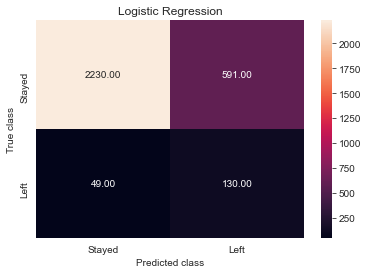

In [275]:
sns.heatmap(confu_mat, annot=True, fmt='.2f',xticklabels = ['Stayed','Left'] , yticklabels = ['Stayed','Left'] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')

# with C=0.01 we got the 78% of accuracy on test set